In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

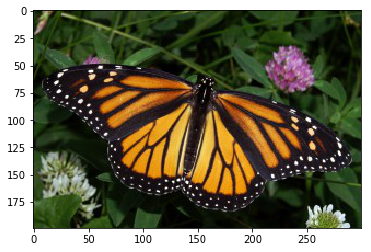

In [4]:
image = cv2.imread('butterfly.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
# To use Kmeans clustering, first reshape the image into array shape (flattened, 3 (color channels))

image.shape
flat_pixels = np.reshape(image,(-1,3))
flat_pixels = np.float32(flat_image) #kmeans work on float numbers32, not int

## Implement K means clustering

Centers:
[[ 189.62931824  141.86482239   75.45077515]
 [  34.79523468   42.69441986   21.72432327]], centers shape:(2, 3)
Centers Converted:
[[189 141  75]
 [ 34  42  21]]
labels:
(59700, 1), labels flattened:(59700,), labels:
[[1]
 [1]
 [1]]


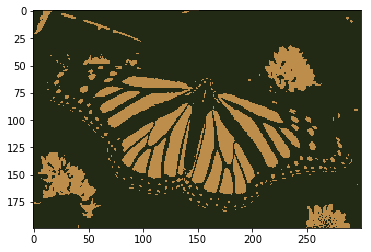

In [53]:
#Set stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# set number of clusters
k = 2

# input pixels, k , labels, criteria, number of attempts, how to choose initial center points
retval, labels, centers = cv2.kmeans(flat_image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#Convert data back to 8-bit values
print("Centers:\n{}, centers shape:{}".format(centers, centers.shape))
centers = np.uint8(centers)
print("Centers Converted:\n{}".format(centers))
print("labels:\n{}, labels flattened:{}, labels:\n{}".format(labels.shape,labels.flatten().shape, labels[:3])) # labels for each pixel in the flattened image

segmented_data = centers[labels.flatten()] # Google numpy index mask
# test= np.array([[0],[0],[0],[1],[1]])
# print("test labels shape:{}, test_labels flattened() :\n{}".format(test.shape,test.flatten()))
# print("centers[labels.flatten()]:\n{}".format(centers[test.flatten()]))

# print("centers[[0],[0]]:{}".format(centers[[[0,0,1]]]))
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)



labels_reshape shape:(199, 300)


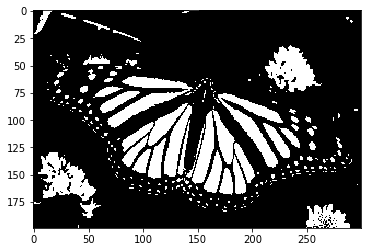

In [64]:
# To show individual clusters as a mask
labels_reshape = np.reshape(labels, (image.shape[0],image.shape[1]))
print("labels_reshape shape:{}".format(labels_reshape.shape))
plt.imshow(labels_reshape==0, cmap='gray')